In [1]:
import torch
import akson
import matplotlib.pyplot as plt

Parametry silnika

In [2]:
b = 0.1
k_m = 0.2
J = 3.
k_e = 0.4
R = 2.
L = 5.

Macierze modelu w przestrzeni stanów

In [3]:
A = torch.tensor([[-b/J, k_m/J], [-k_e/L, -R/L]]).to(torch.float64)
B = torch.tensor([[0.], [1./L]]).to(torch.float64)
C = torch.tensor([[1., 0.]]).to(torch.float64)
D = torch.tensor([[0.]]).to(torch.float64)
initial_state = torch.tensor([[0.], [0.]]).to(torch.float64)

In [10]:
continous_system = akson.ContinousFiniteLTISystem(A, B, C, D, initial_state)

In [14]:
T = 1.
discrete_system = continous_system.discretize(T)

In [15]:
y_d = discrete_system.step_response(len=50)

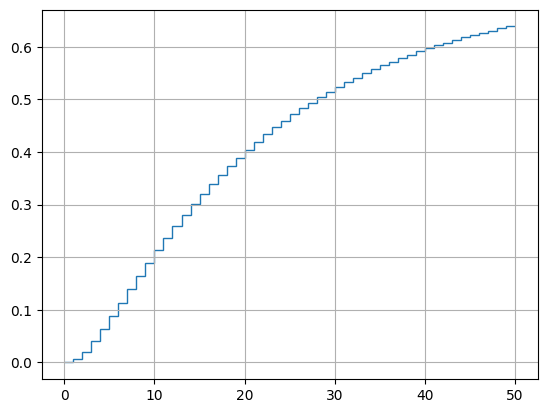

In [16]:
plt.stairs(y_d.squeeze(), torch.arange(51)*T, baseline=None)
plt.grid()
plt.show()

In [17]:
t, y = continous_system.step_response(duration=50., step_size=0.01)

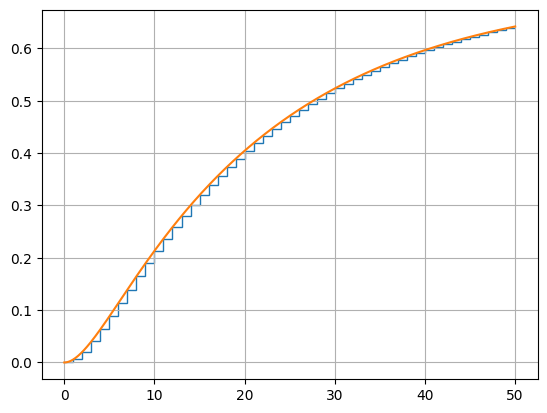

In [18]:
plt.stairs(y_d.squeeze(), torch.arange(51)*T, baseline=None)
plt.plot(t, y)
plt.grid()
plt.show()